### 구간 분할, 이산화 그리고 선형 모델, 트리 모델(p.285)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system..')


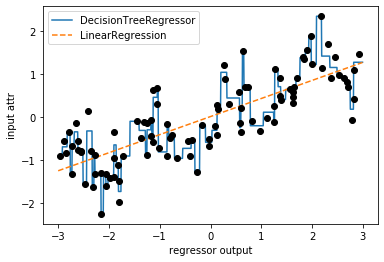

In [9]:
# 데이터의 특성 뿐만 아니라 어떤 모델을 사용하는지에 따라 성능이 다르다.
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 데이터셋 가져오기
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1) 
# endpoint : 마지막 값을 포함할 것인지 

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y) # 최소 트리갯수 3개
plt.plot(line, reg.predict(line), label='DecisionTreeRegressor')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label = 'LinearRegression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('regressor output')
plt.ylabel('input attr')
plt.legend(loc='best')
plt.show()

# 특성이 하나일 때 선형은 직선으로 나탄다.
# 결정트리는 훨씬 복잡한 모델을 만들 수 있다.

In [4]:
# 구간분할(한 특성을 여러 특성으로 나누는 - 이산화)
bins = np.linspace(-3, 3, 11) # -3부터 3까지 11개 구간으로 나눔
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [5]:
which_bin = np.digitize(X, bins=bins) # 데이터, 구간
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) # sparse : 희소행렬
encoder.fit(which_bin)

# 원-핫-인코딩으로 변환
X_binned = encoder.transform(which_bin)

print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\Users\has91\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
print("X_binned.shape: {}". format(X_binned.shape))

X_binned.shape: (100, 10)


C:\Users\has91\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


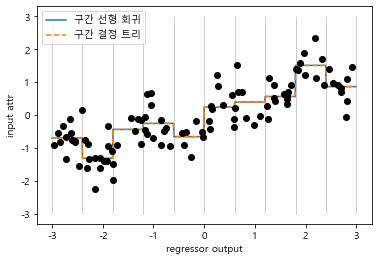

In [12]:
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = '구간 선형 회귀')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label = '구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth = 1, alpha=.2)
plt.legend(loc='best')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.show()

# 구간분할은 선형 모델에 영향을 많이 준다.